# Calculate ink method for elaboration

Method: Use ink amount. For correction, look at the average of the ink of _n_ least-inked images to set a minimum, and correct elaboration against the baseline. The 'least-ink' images should be blank, un-filled out images. In case of cropping errors I don't want to just save the lowest ink pic.

In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
from figural.scoring import FiguralImage
from figural.utils import task_ref, collage
from pathlib import Path
import pandas as pd
import yaml
from tqdm.auto import tqdm

In [82]:
# load test reference
with open('../../config.yaml') as f:
    data = yaml.safe_load(f)

In [83]:
root_dir = Path(data['root_dir'])
collector = []
for test in data['tests']:
    testname = test['name']
    print("TEST:", testname.upper())

    for task in tqdm(test['tasks']):
        impaths = task_ref(root_dir / task['directory'])

        for activity, paths in tqdm(impaths.items()):
            for path in paths:
                im = FiguralImage(path)
                elab = im.elaboration()
                row = dict(test=test['name'], path=str(path), id=path.stem, booklet=task['name'], elaboration_raw=elab, activity=activity)
                collector.append(row)

df = pd.DataFrame(collector)

# REMOVED - classwise normed elab
#def elaboration_correction(x):
#    min_ink = x.sort_values().head(2).mean()
#    max_ink = x.sort_values().tail(2).mean()
#    prop_ink = (x.clip(upper=max_ink) - min_ink).clip(lower=0) / (max_ink-min_ink)
#    return prop_ink

#df['elaboration'] = df.groupby('activity').elaboration_raw.transform(elaboration_correction)

print(len(df))
df.sample()

TEST: TTCT


  0%|          | 0/1 [00:00<?, ?it/s]

Directories of images:	activity2b (452 files)	activity2e (452 files)	activity2j (452 files)	activity2d (452 files)	activity2c (452 files)	activity2f (452 files)	activity2a (452 files)	activity2h (452 files)	activity2i (452 files)	activity2g (452 files)	activity1 (415 files)	


  0%|          | 0/11 [00:00<?, ?it/s]

TEST: AUDRA


  0%|          | 0/3 [00:00<?, ?it/s]

Directories of images:	Images_56 (1081 files)	Images_4 (554 files)	Images_3 (1107 files)	Images_4.1_common (553 files)	Images_11 (691 files)	Images_17 (1102 files)	Images_19 (1059 files)	Images_8 (702 files)	Images_9 (713 files)	Images_7 (703 files)	Images_12 (678 files)	Images_15 (1079 files)	Images_13 (1053 files)	


  0%|          | 0/13 [00:00<?, ?it/s]

Directories of images:	Images_2 (97 files)	Images_5 (96 files)	Images_4 (93 files)	Images_3 (96 files)	Images_6 (97 files)	Images_1 (97 files)	Images_7 (94 files)	


  0%|          | 0/7 [00:00<?, ?it/s]

Directories of images:	Images_2 (97 files)	Images_5 (97 files)	Images_4 (97 files)	Images_3 (97 files)	Images_6 (97 files)	Images_1 (97 files)	Images_7 (97 files)	


  0%|          | 0/7 [00:00<?, ?it/s]

17359


,test,path,id,booklet,elaboration_raw,activity
14297,audra,../../../../data/others/audra/drawings/primary...,8732_15,primary,0.0695,Images_15


In [103]:
# save to disk
df.to_csv(root_dir / 'data/elaboration.csv', index=False)

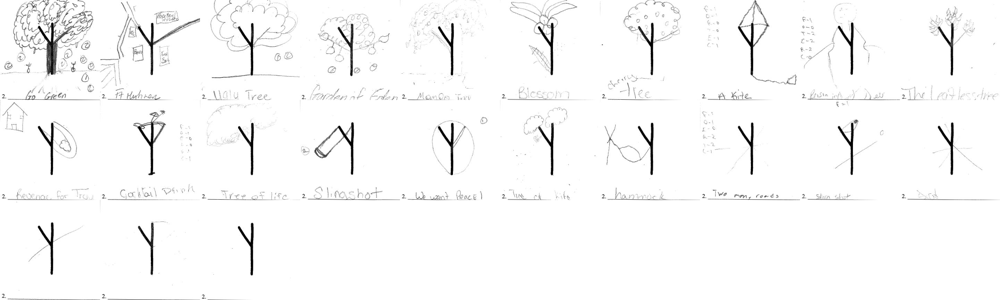

In [101]:
# Preview on TTCT: every 20th image, most to least ink
collage(df[df.activity == 'activity2b'].sort_values('elaboration_raw').path.tolist()[::-20], 10, thumbnail=(1000,1000))

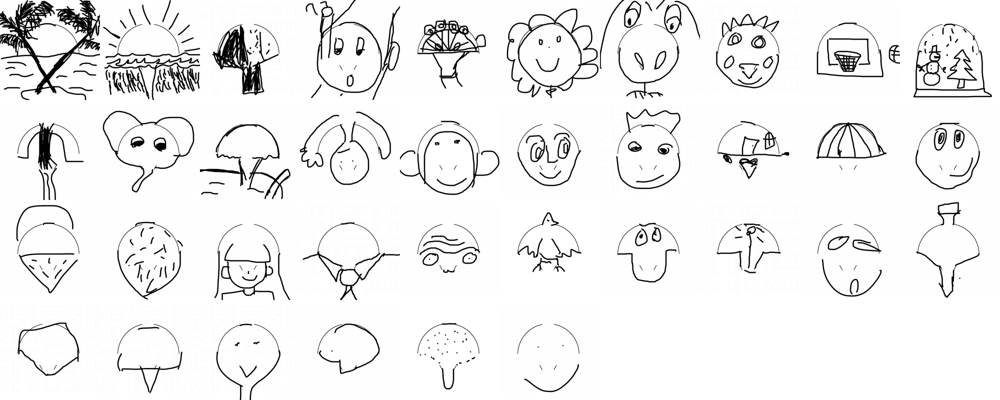

In [100]:
# Preview on MTCI: every 20th image, most to least ink
collage(df[df.activity == 'Images_8'].sort_values('elaboration_raw').path.tolist()[::-20], 10, thumbnail=(1000,1000))